# Animal Classification Project - Part 2
## Bret Young
## 21 April 2020

### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Step 1:  Load data into a dataframe

In [2]:
file = '/Users/bretyoung/Desktop/DSC 550/zoo.csv'
data = pd.read_csv(file)

### Step 2:  check the dimension

In [3]:
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (101, 18)


### Step 3:  Look at the data

In [4]:
print(data.head(5))

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

### Step 4:	Think about some questions that might help you predict classifications.
- Does the animal have hair?
- Does the animal have feathers?
- Does the animal lay eggs?
- Does the animal produce milk?
- Does the animal spend time airborne?
- Is the animal aquatic?
- Does the animal have teeth?
- Does the animal have a backbone?
- How many legs does the animal have?
- Does the animal have fins?

### Step 5:  what type of variables are in the table 

In [5]:
print("Describe Data")
print(data.describe())

print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.49

Most of the variables are Boolean, so some of the metrics do not have much meaning.  

### Step 6: Histograms

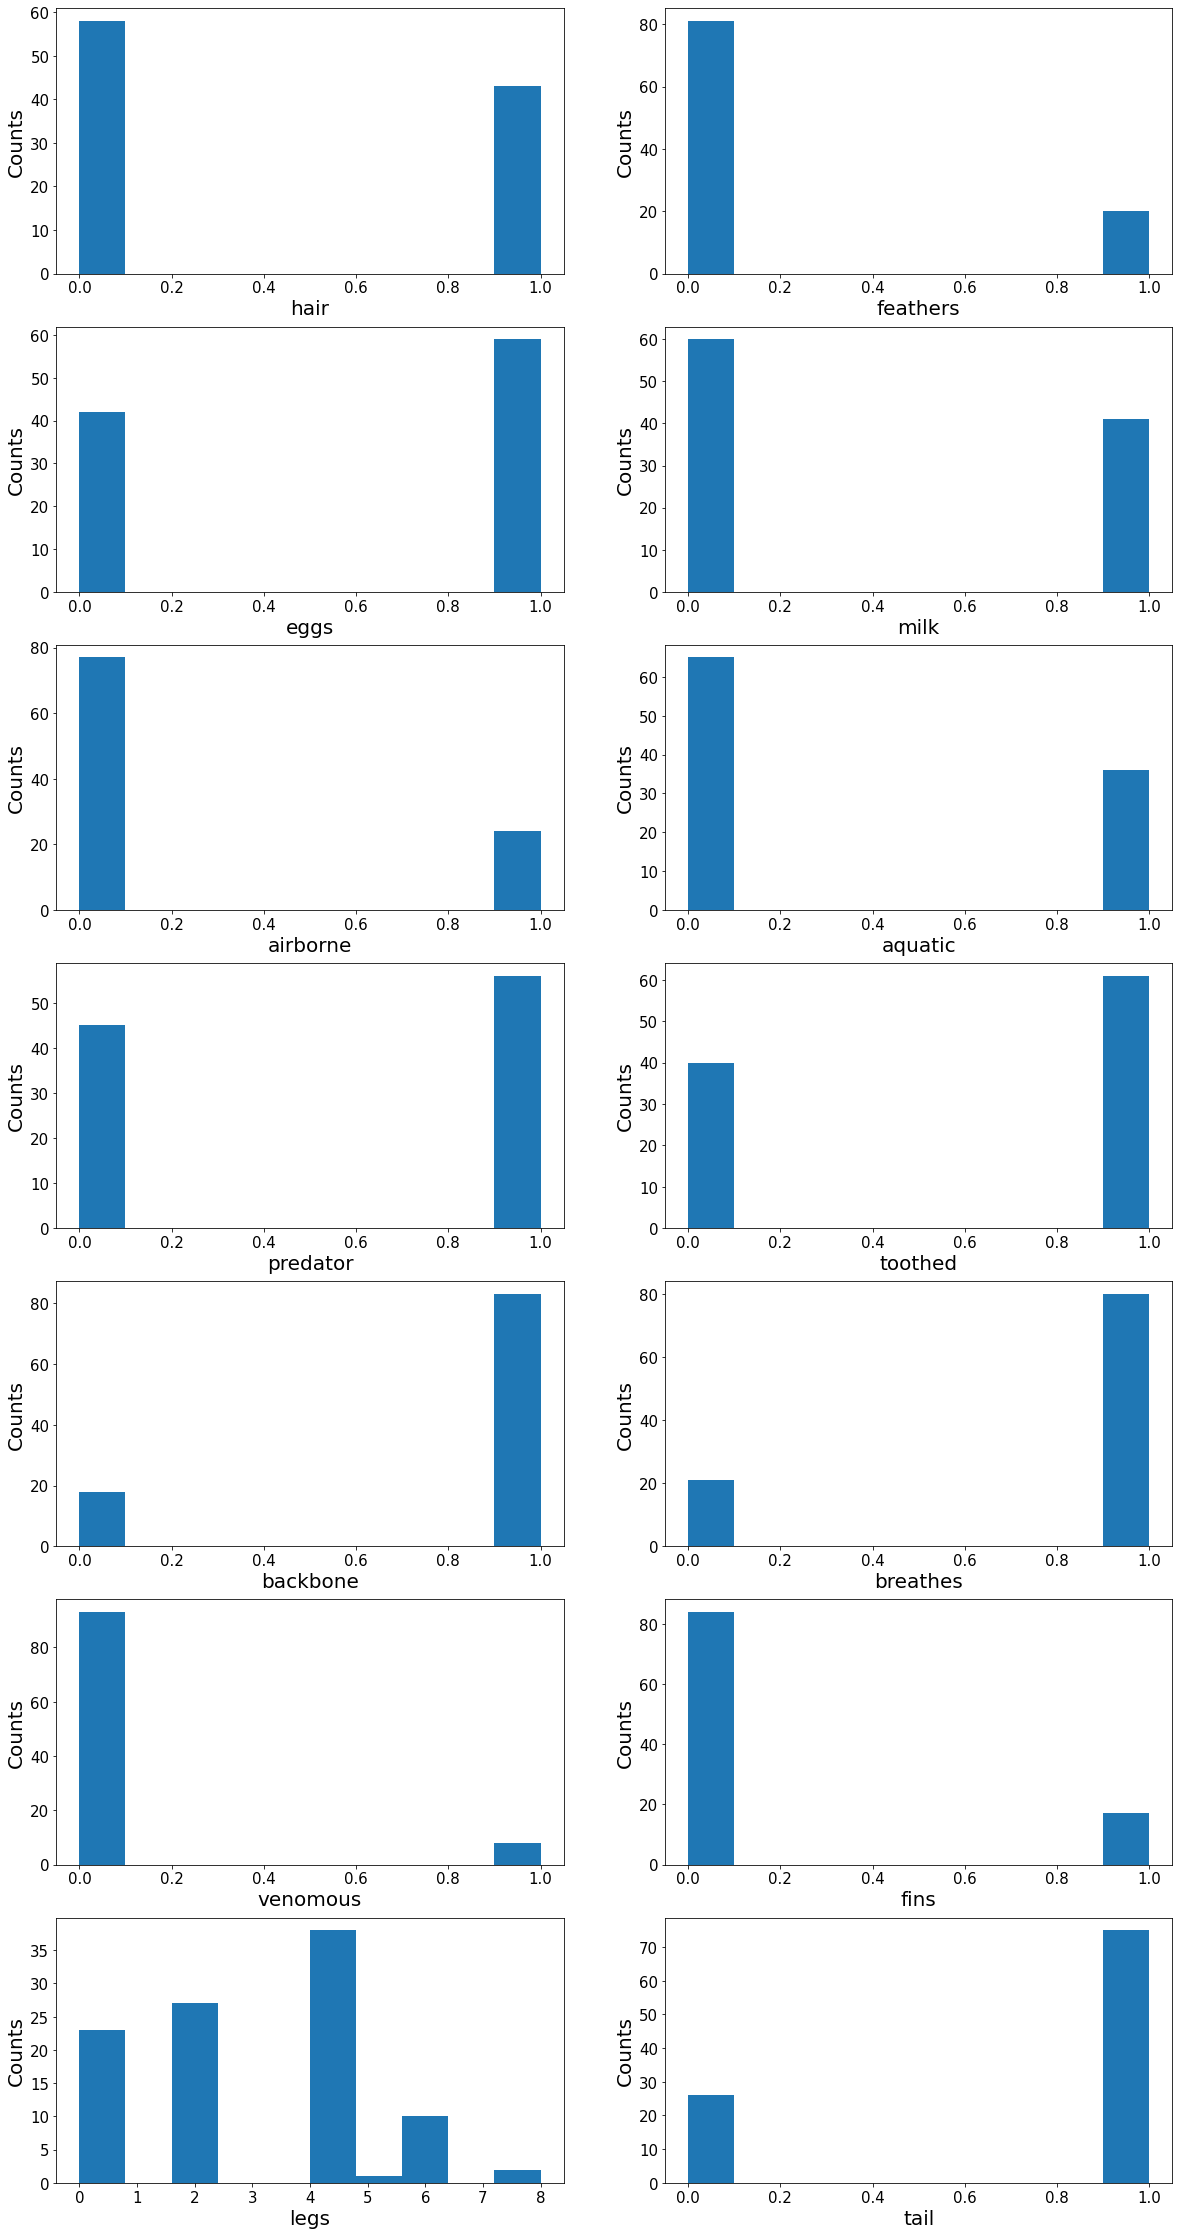

In [6]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 40)

# make subplots
fig, axes = plt.subplots(nrows = 7, ncols = 2)

# Specify the features of interest
num_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna())
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

### Step 7: Barcharts

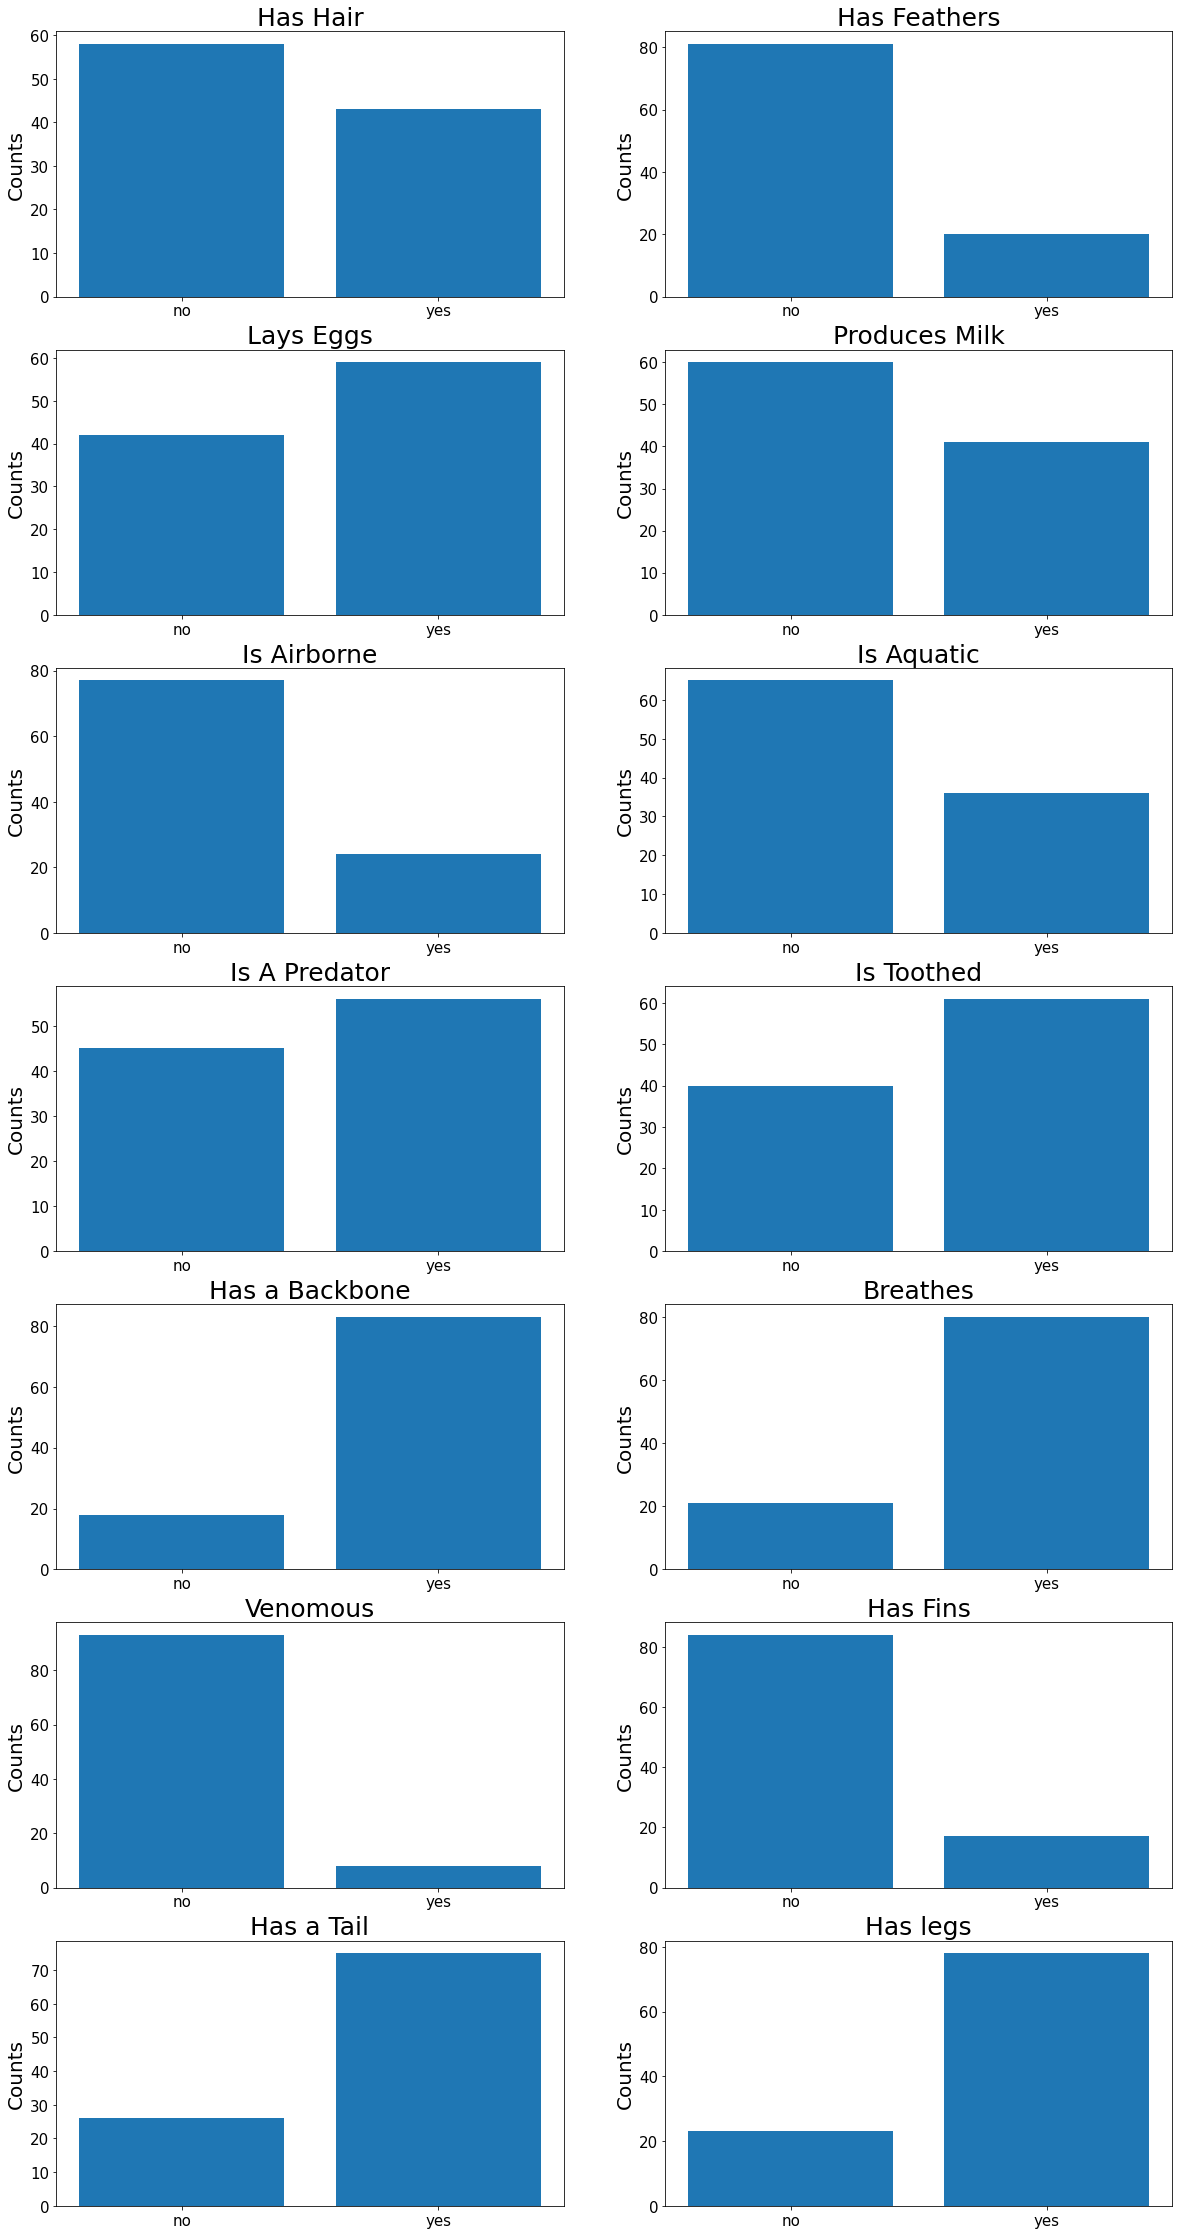

In [7]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 40)

# make subplots
fig, axes = plt.subplots(nrows = 7, ncols = 2)

# make the data read to feed into the visulizer - hair
X_hair = data.replace({'hair': {1: 'yes', 0: 'no'}}).groupby('hair').size().reset_index(name='Counts')['hair']
Y_hair = data.replace({'hair': {1: 'yes', 0: 'no'}}).groupby('hair').size().reset_index(name='Counts')['Counts']

# make the bar plot for hair
axes[0, 0].bar(X_hair, Y_hair)
axes[0, 0].set_title('Has Hair', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer - feathers
X_feathers = data.replace({'feathers': {1: 'yes', 0: 'no'}}).groupby('feathers').size().reset_index(name='Counts')['feathers']
Y_feathers = data.replace({'feathers': {1: 'yes', 0: 'no'}}).groupby('feathers').size().reset_index(name='Counts')['Counts']

# make the bar plot for feathers
axes[0, 1].bar(X_feathers, Y_feathers)
axes[0, 1].set_title('Has Feathers', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer - eggs
X_eggs = data.replace({'eggs': {1: 'yes', 0: 'no'}}).groupby('eggs').size().reset_index(name='Counts')['eggs']
Y_eggs = data.replace({'eggs': {1: 'yes', 0: 'no'}}).groupby('eggs').size().reset_index(name='Counts')['Counts']

# make the bar plot for eggs
axes[1, 0].bar(X_eggs, Y_eggs)
axes[1, 0].set_title('Lays Eggs', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer - milk
X_milk = data.replace({'milk': {1: 'yes', 0: 'no'}}).groupby('milk').size().reset_index(name='Counts')['milk']
Y_milk = data.replace({'milk': {1: 'yes', 0: 'no'}}).groupby('milk').size().reset_index(name='Counts')['Counts']

# make the bar plot for milk
axes[1, 1].bar(X_milk, Y_milk)
axes[1, 1].set_title('Produces Milk', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer - airborne
X_airborne = data.replace({'airborne': {1: 'yes', 0: 'no'}}).groupby('airborne').size().reset_index(name='Counts')['airborne']
Y_airborne = data.replace({'airborne': {1: 'yes', 0: 'no'}}).groupby('airborne').size().reset_index(name='Counts')['Counts']

# make the bar plot for airborne
axes[2, 0].bar(X_airborne, Y_airborne)
axes[2, 0].set_title('Is Airborne', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer - aquatic
X_aquatic = data.replace({'aquatic': {1: 'yes', 0: 'no'}}).groupby('aquatic').size().reset_index(name='Counts')['aquatic']
Y_aquatic = data.replace({'aquatic': {1: 'yes', 0: 'no'}}).groupby('aquatic').size().reset_index(name='Counts')['Counts']

# make the bar plot for aquatic
axes[2, 1].bar(X_aquatic, Y_aquatic)
axes[2, 1].set_title('Is Aquatic', fontsize=25)
axes[2, 1].set_ylabel('Counts', fontsize=20)
axes[2, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer - predator
X_predator = data.replace({'predator': {1: 'yes', 0: 'no'}}).groupby('predator').size().reset_index(name='Counts')['predator']
Y_predator = data.replace({'predator': {1: 'yes', 0: 'no'}}).groupby('predator').size().reset_index(name='Counts')['Counts']

# make the bar plot for predator
axes[3, 0].bar(X_predator, Y_predator)
axes[3, 0].set_title('Is A Predator', fontsize=25)
axes[3, 0].set_ylabel('Counts', fontsize=20)
axes[3, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer - toothed
X_toothed = data.replace({'toothed': {1: 'yes', 0: 'no'}}).groupby('toothed').size().reset_index(name='Counts')['toothed']
Y_toothed = data.replace({'toothed': {1: 'yes', 0: 'no'}}).groupby('toothed').size().reset_index(name='Counts')['Counts']

# make the bar plot for toothed
axes[3, 1].bar(X_toothed, Y_toothed)
axes[3, 1].set_title('Is Toothed', fontsize=25)
axes[3, 1].set_ylabel('Counts', fontsize=20)
axes[3, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer - backbone
X_backbone = data.replace({'backbone': {1: 'yes', 0: 'no'}}).groupby('backbone').size().reset_index(name='Counts')['backbone']
Y_backbone = data.replace({'backbone': {1: 'yes', 0: 'no'}}).groupby('backbone').size().reset_index(name='Counts')['Counts']

# make the bar plot for backbone
axes[4, 0].bar(X_backbone, Y_backbone)
axes[4, 0].set_title('Has a Backbone', fontsize=25)
axes[4, 0].set_ylabel('Counts', fontsize=20)
axes[4, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer - breathes
X_breathes = data.replace({'breathes': {1: 'yes', 0: 'no'}}).groupby('breathes').size().reset_index(name='Counts')['breathes']
Y_breathes = data.replace({'breathes': {1: 'yes', 0: 'no'}}).groupby('breathes').size().reset_index(name='Counts')['Counts']

# make the bar plot for breathes
axes[4, 1].bar(X_breathes, Y_breathes)
axes[4, 1].set_title('Breathes', fontsize=25)
axes[4, 1].set_ylabel('Counts', fontsize=20)
axes[4, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer - venomous
X_venomous = data.replace({'venomous': {1: 'yes', 0: 'no'}}).groupby('venomous').size().reset_index(name='Counts')['venomous']
Y_venomous = data.replace({'venomous': {1: 'yes', 0: 'no'}}).groupby('venomous').size().reset_index(name='Counts')['Counts']

# make the bar plot for venomous
axes[5, 0].bar(X_venomous, Y_venomous)
axes[5, 0].set_title('Venomous', fontsize=25)
axes[5, 0].set_ylabel('Counts', fontsize=20)
axes[5, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer - fins
X_fins = data.replace({'fins': {1: 'yes', 0: 'no'}}).groupby('fins').size().reset_index(name='Counts')['fins']
Y_fins = data.replace({'fins': {1: 'yes', 0: 'no'}}).groupby('fins').size().reset_index(name='Counts')['Counts']

# make the bar plot for fins
axes[5, 1].bar(X_fins, Y_fins)
axes[5, 1].set_title('Has Fins', fontsize=25)
axes[5, 1].set_ylabel('Counts', fontsize=20)
axes[5, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer - tail
X_tail = data.replace({'tail': {1: 'yes', 0: 'no'}}).groupby('tail').size().reset_index(name='Counts')['tail']
Y_tail = data.replace({'tail': {1: 'yes', 0: 'no'}}).groupby('tail').size().reset_index(name='Counts')['Counts']

# make the bar plot for tail
axes[6, 0].bar(X_tail, Y_tail)
axes[6, 0].set_title('Has a Tail', fontsize=25)
axes[6, 0].set_ylabel('Counts', fontsize=20)
axes[6, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer - legs
X_legs = data.replace({'legs': {2: 'yes', 4: 'yes', 5: 'yes',6: 'yes', 8: 'yes', 0: 'no'}}).groupby('legs').size().reset_index(name='Counts')['legs']
Y_legs = data.replace({'legs': {2: 'yes', 4: 'yes', 5: 'yes',6: 'yes', 8: 'yes', 0: 'no'}}).groupby('legs').size().reset_index(name='Counts')['Counts']

# make the bar plot for legs
axes[6, 1].bar(X_legs, Y_legs)
axes[6, 1].set_title('Has legs', fontsize=25)
axes[6, 1].set_ylabel('Counts', fontsize=20)
axes[6, 1].tick_params(axis='both', labelsize=15)

plt.show()

### Step 8: Pearson Ranking

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


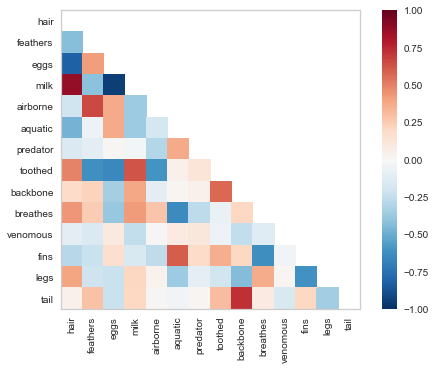

In [8]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X) # Fit the data to the visualizer
visualizer.transform(X) # Transform the data
plt.show()

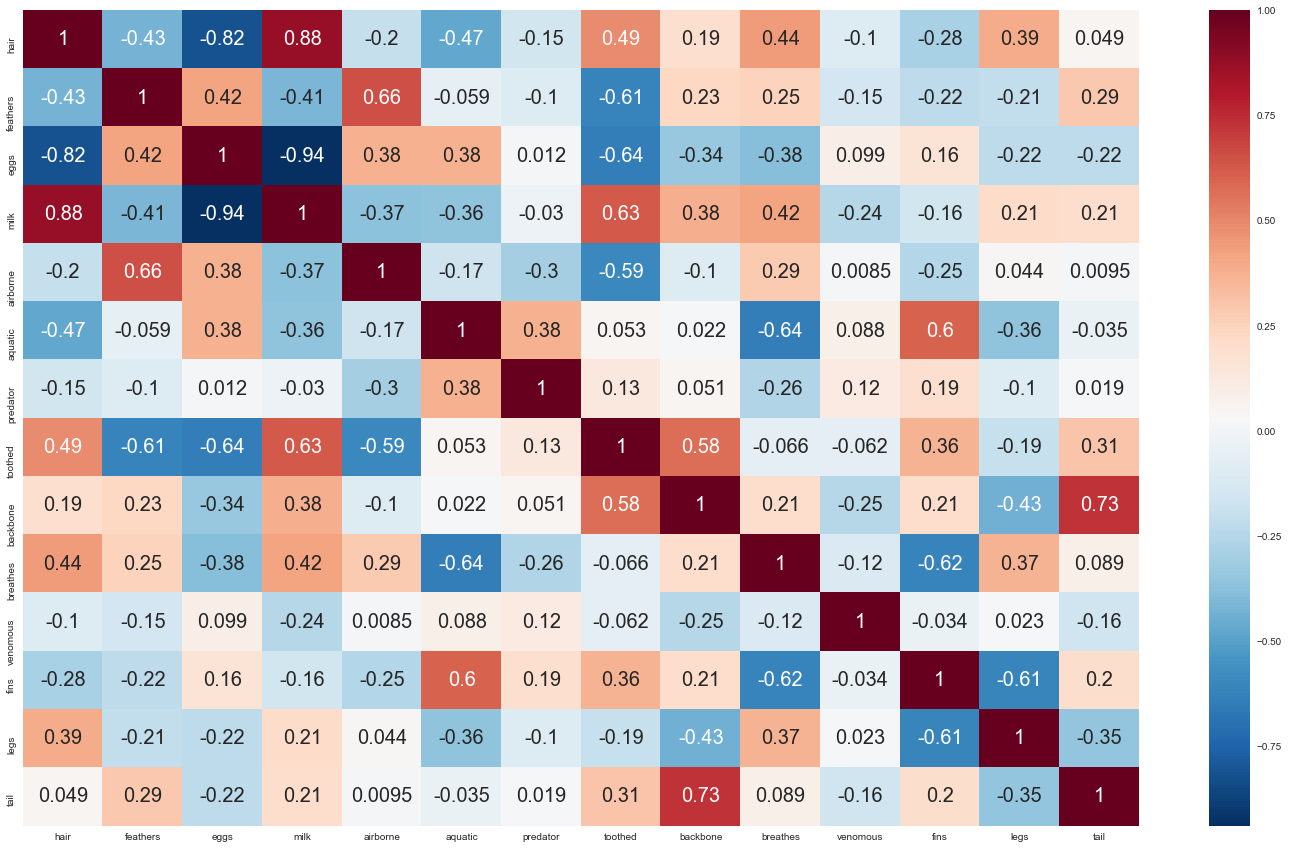

In [9]:
# set the figure size
plt.rcParams['figure.figsize'] = (25, 15)

# set dataframe to include only the variables in the list num_features
selected_data = data[['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail']]

# correlation matrix using seaborn
corrMatrix = selected_data.corr() # takes Pearson correlation by defalut of the dataframe
sn.heatmap(corrMatrix, annot=True, annot_kws={"size": 20}, cmap="RdBu_r") # creats a heatmap with annotations and a annotation text size of 20. cmap was also set to match yellowbrick's default
sn.set(font_scale=3) # changes the scale of axis text
plt.show()

### Step 9:  Compare variables against classification

Variables By Class
Class_type Key:
{1: 'Mammal', 2: 'Bird', 3: 'Reptile', 4: 'Fish', 5: 'Amphibian', 6: 'Bug', 7: 'Invertibrate'}


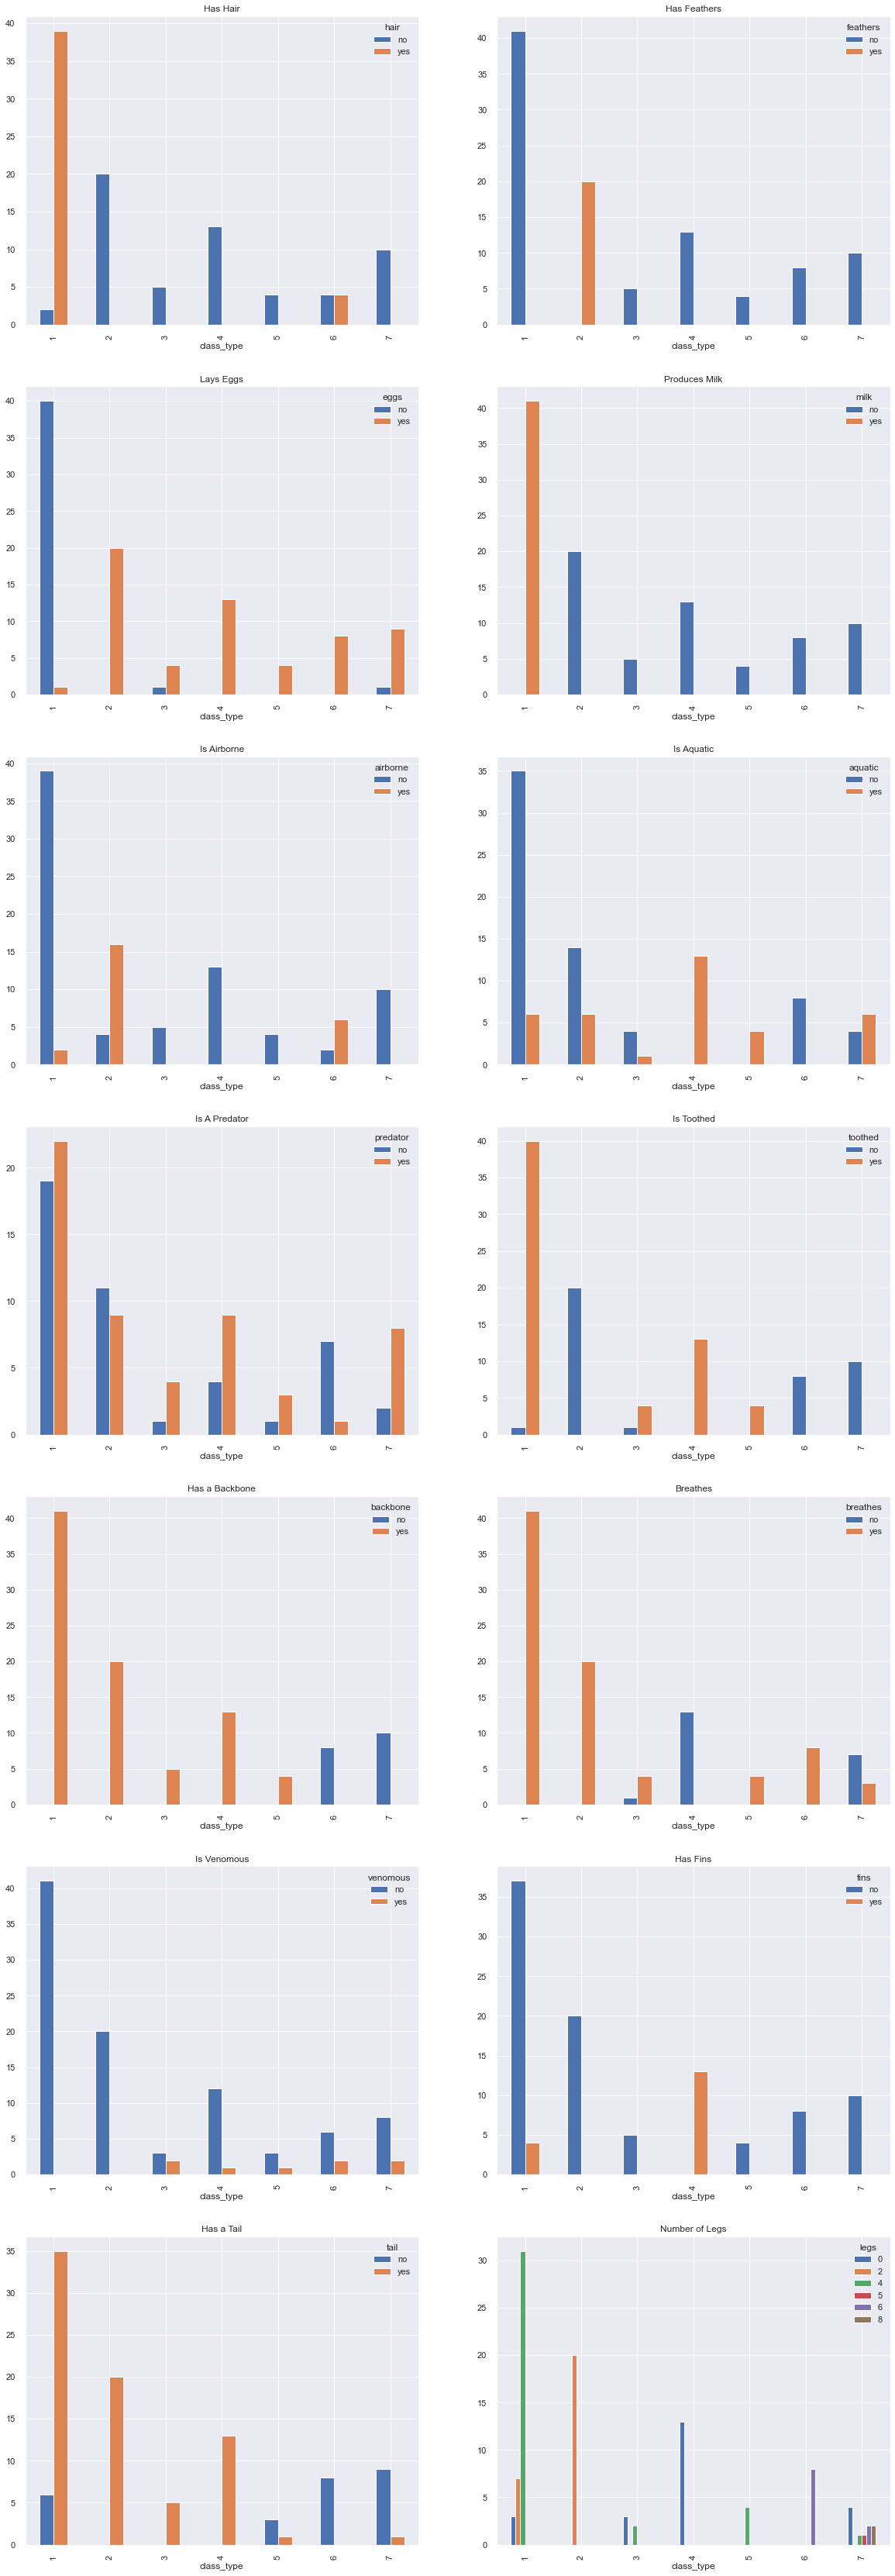

In [10]:
import numpy as np

# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 60)
sn.set(font_scale=1)

# make subplots
fig, axes = plt.subplots(nrows = 7, ncols = 2)

print('Variables By Class')
print('Class_type Key:')
print({1: 'Mammal', 2: 'Bird', 3: 'Reptile', 4: 'Fish', 5: 'Amphibian', 6: 'Bug', 7: 'Invertibrate'})


# make the data read to feed into the visulizer - hair
X_hair_2 = data.replace({'hair': {1: 'yes', 0: 'no'}}).groupby(['class_type', 'hair']).size().reset_index(name='Counts')
# convert data to pivot table to plot multiple categories - hair
X_hair_3 = pd.pivot_table(X_hair_2,  values='Counts',  columns=['hair'],  index = "class_type",
                         aggfunc=np.sum,  fill_value=0)
# generate bar plot - hair
X_hair_3.plot(kind='bar', ax = axes[0, 0], title = 'Has Hair')


# make the data read to feed into the visulizer - feathers
X_feathers_2 = data.replace({'feathers': {1: 'yes', 0: 'no'}}).groupby(['class_type', 'feathers']).size().reset_index(name='Counts')
# convert data to pivot table to plot multiple categories - feathers
X_feathers_3 = pd.pivot_table(X_feathers_2,  values='Counts',  columns=['feathers'],  index = "class_type",
                         aggfunc=np.sum,  fill_value=0)
# generate bar plot - feathers
X_feathers_3.plot(kind='bar', ax = axes[0, 1], title = 'Has Feathers')


# make the data read to feed into the visulizer - eggs
X_eggs_2 = data.replace({'eggs': {1: 'yes', 0: 'no'}}).groupby(['class_type', 'eggs']).size().reset_index(name='Counts')
# convert data to pivot table to plot multiple categories - eggs
X_eggs_3 = pd.pivot_table(X_eggs_2,  values='Counts',  columns=['eggs'],  index = "class_type",
                         aggfunc=np.sum,  fill_value=0)
# generate bar plot - eggs
X_eggs_3.plot(kind='bar', ax = axes[1, 0], title = 'Lays Eggs')


# make the data read to feed into the visulizer - milk
X_milk_2 = data.replace({'milk': {1: 'yes', 0: 'no'}}).groupby(['class_type', 'milk']).size().reset_index(name='Counts')
# convert data to pivot table to plot multiple categories - milk
X_milk_3 = pd.pivot_table(X_milk_2,  values='Counts',  columns=['milk'],  index = "class_type",
                         aggfunc=np.sum,  fill_value=0)
# generate bar plot - milk
X_milk_3.plot(kind='bar', ax = axes[1, 1], title = 'Produces Milk')


# make the data read to feed into the visulizer - airborne
X_airborne_2 = data.replace({'airborne': {1: 'yes', 0: 'no'}}).groupby(['class_type', 'airborne']).size().reset_index(name='Counts')
# convert data to pivot table to plot multiple categories - airborne
X_airborne_3 = pd.pivot_table(X_airborne_2,  values='Counts',  columns=['airborne'],  index = "class_type",
                         aggfunc=np.sum,  fill_value=0)
# generate bar plot - airborne
X_airborne_3.plot(kind='bar', ax = axes[2, 0], title = 'Is Airborne')


# make the data read to feed into the visulizer - aquatic
X_aquatic_2 = data.replace({'aquatic': {1: 'yes', 0: 'no'}}).groupby(['class_type', 'aquatic']).size().reset_index(name='Counts')
# convert data to pivot table to plot multiple categories - aquatic
X_aquatic_3 = pd.pivot_table(X_aquatic_2,  values='Counts',  columns=['aquatic'],  index = "class_type",
                         aggfunc=np.sum,  fill_value=0)
# generate bar plot - aquatic
X_aquatic_3.plot(kind='bar', ax = axes[2, 1], title = 'Is Aquatic')


# make the data read to feed into the visulizer - predator
X_predator_2 = data.replace({'predator': {1: 'yes', 0: 'no'}}).groupby(['class_type', 'predator']).size().reset_index(name='Counts')
# convert data to pivot table to plot multiple categories - predator
X_predator_3 = pd.pivot_table(X_predator_2,  values='Counts',  columns=['predator'],  index = "class_type",
                         aggfunc=np.sum,  fill_value=0)
# generate bar plot - predator
X_predator_3.plot(kind='bar', ax = axes[3, 0], title = 'Is A Predator')


# make the data read to feed into the visulizer - toothed
X_toothed_2 = data.replace({'toothed': {1: 'yes', 0: 'no'}}).groupby(['class_type', 'toothed']).size().reset_index(name='Counts')
# convert data to pivot table to plot multiple categories - toothed
X_toothed_3 = pd.pivot_table(X_toothed_2,  values='Counts',  columns=['toothed'],  index = "class_type",
                         aggfunc=np.sum,  fill_value=0)
# generate bar plot - toothed
X_toothed_3.plot(kind='bar', ax = axes[3, 1], title = 'Is Toothed')


# make the data read to feed into the visulizer - backbone
X_backbone_2 = data.replace({'backbone': {1: 'yes', 0: 'no'}}).groupby(['class_type', 'backbone']).size().reset_index(name='Counts')
# convert data to pivot table to plot multiple categories - backbone
X_backbone_3 = pd.pivot_table(X_backbone_2,  values='Counts',  columns=['backbone'],  index = "class_type",
                         aggfunc=np.sum,  fill_value=0)
# generate bar plot - backbone
X_backbone_3.plot(kind='bar', ax = axes[4, 0], title = 'Has a Backbone')


# make the data read to feed into the visulizer - breathes
X_breathes_2 = data.replace({'breathes': {1: 'yes', 0: 'no'}}).groupby(['class_type', 'breathes']).size().reset_index(name='Counts')
# convert data to pivot table to plot multiple categories - breathes
X_breathes_3 = pd.pivot_table(X_breathes_2,  values='Counts',  columns=['breathes'],  index = "class_type",
                         aggfunc=np.sum,  fill_value=0)
# generate bar plot - breathes
X_breathes_3.plot(kind='bar', ax = axes[4, 1], title = 'Breathes')


# make the data read to feed into the visulizer - venomous
X_venomous_2 = data.replace({'venomous': {1: 'yes', 0: 'no'}}).groupby(['class_type', 'venomous']).size().reset_index(name='Counts')
# convert data to pivot table to plot multiple categories - venomous
X_venomous_3 = pd.pivot_table(X_venomous_2,  values='Counts',  columns=['venomous'],  index = "class_type",
                         aggfunc=np.sum,  fill_value=0)
# generate bar plot - venomous
X_venomous_3.plot(kind='bar', ax = axes[5, 0], title = 'Is Venomous')


# make the data read to feed into the visulizer - fins
X_fins_2 = data.replace({'fins': {1: 'yes', 0: 'no'}}).groupby(['class_type', 'fins']).size().reset_index(name='Counts')
# convert data to pivot table to plot multiple categories - fins
X_fins_3 = pd.pivot_table(X_fins_2,  values='Counts',  columns=['fins'],  index = "class_type",
                         aggfunc=np.sum,  fill_value=0)
# generate bar plot - fins
X_fins_3.plot(kind='bar', ax = axes[5, 1], title = 'Has Fins')


# make the data read to feed into the visulizer - tail
X_tail_2 = data.replace({'tail': {1: 'yes', 0: 'no'}}).groupby(['class_type', 'tail']).size().reset_index(name='Counts')
# convert data to pivot table to plot multiple categories - tail
X_tail_3 = pd.pivot_table(X_tail_2,  values='Counts',  columns=['tail'],  index = "class_type",
                         aggfunc=np.sum,  fill_value=0)
# generate bar plot - tail
X_tail_3.plot(kind='bar', ax = axes[6, 0], title = 'Has a Tail')


# make the data read to feed into the visulizer - legs
X_legs_2 = data.groupby(['class_type', 'legs']).size().reset_index(name='Counts')
# convert data to pivot table to plot multiple categories - legs
X_legs_3 = pd.pivot_table(X_legs_2,  values='Counts',  columns=['legs'],  index = "class_type",
                         aggfunc=np.sum,  fill_value=0)
# generate bar plot - legs
X_legs_3.plot(kind='bar', ax = axes[6, 1], title = 'Number of Legs')

### Step 10 - convert categorical data to numbers

In [24]:
# get the categorical data
cat_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail']
data_cat = data[cat_features]
data_cat = data_cat.replace({'legs': {0: '0', 2: '2', 4: '4', 5: '5', 6: '6', 8: '8'}})

y = data.iloc[:, 17]

# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

# check the data
print(data_cat_dummies.head(8))

   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   
5     1         0     0     1         0        0         0        1         1   
6     1         0     0     1         0        0         0        1         1   
7     0         0     1     0         0        1         0        1         1   

   breathes  venomous  fins  tail  legs_0  legs_2  legs_4  legs_5  legs_6  \
0         1         0     0     0       0       0       1       0       0   
1         1         0     0     1       0       0       1       0       0   
2         0         0     1     1      

### Part 11 - Feature Importance/ Selection

In [12]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
fe_model = ExtraTreesClassifier(n_estimators=20)
fe_model.fit(data_cat_dummies, y)

# return the importance values
for index, val in enumerate(data_cat_dummies):
    print(val, '- Importance Value: ', fe_model.feature_importances_[index])

hair - Importance Value:  0.06830011305945569
feathers - Importance Value:  0.03868812924841845
eggs - Importance Value:  0.106671154814407
milk - Importance Value:  0.1611738500765868
airborne - Importance Value:  0.03706513460914214
aquatic - Importance Value:  0.03547120297550427
predator - Importance Value:  0.01463309160603772
toothed - Importance Value:  0.09065221279362387
backbone - Importance Value:  0.06531134300819535
breathes - Importance Value:  0.06466683704779326
venomous - Importance Value:  0.0067537338746749016
fins - Importance Value:  0.06500682189698112
tail - Importance Value:  0.04914433140789225
legs_0 - Importance Value:  0.0274964206325888
legs_2 - Importance Value:  0.0976127453552437
legs_4 - Importance Value:  0.023894977351672213
legs_5 - Importance Value:  0.00019661965827728789
legs_6 - Importance Value:  0.044253030248342276
legs_8 - Importance Value:  0.0030082503351628966


We can see above that there are a few features with low feature importance values which would indicate the features could be dropped from the model. I have selected anything with an importance value of less than 0.01 to exclude.

In [25]:
# remove features
remove_me = []
for index, val in enumerate(data_cat_dummies):
    if fe_model.feature_importances_[index] < 0.01:
        remove_me.append(index)
        
# display feature indexes to remove
print('Feature index to remove: ', remove_me)

# remove features
data_cat_dummies = data_cat_dummies.drop(data_cat_dummies.columns[remove_me], axis = 1)
print(data_cat_dummies.shape)

Feature index to remove:  [10, 16, 18]
(101, 16)
